In [6]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import ggplot

from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from IPython.display import display   

%matplotlib inline

In [7]:
# 1. You can choose to load the data into pandas DataFrame straight from the URL
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# 2. or you can also download the dataset manually. In this case change the URL accordingly. 
# curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data > adult.data
# curl  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names > adult.names

adult = pd.read_table(
    URL,
    
    # specify the file encoding
    encoding="utf-8",
    
    # specify the separator in the data
    sep=",",      # comma separated values
    
    # ignore spaces after the separator
    skipinitialspace=True,
    index_col=None,
    
    # use manual headers
    header=None,
    names=[
        "age", "workclass", "fnlwgt", "education", 
        "education-num", "marital-status", "occupation",
        "relationship", "race", "sex", "capital-gain", 
        "capital-loss", "hours-per-week", "native-country",
        "wage"
    ]
)

pd.set_option("display.max_rows", 10)
display(adult)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
adult.info()

groupby_wage = adult.groupby("wage").describe()
for i in groupby_wage.columns.levels[0]:
    groupby_wage[i].index.name= "wage / " + str(i)
    display(groupby_wage[i])

print(adult["wage"].unique())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,count,mean,std,min,25%,50%,75%,max
wage / age,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


,count,mean,std,min,25%,50%,75%,max
wage / fnlwgt,,,,,,,,
<=50K,24720.0,190340.86517,106482.271195,12285.0,117606.0,179465.0,239023.0,1484705.0
>50K,7841.0,188005.00000,102541.775472,14878.0,119101.0,176101.0,230959.0,1226583.0


,count,mean,std,min,25%,50%,75%,max
wage / education-num,,,,,,,,
<=50K,24720.0,9.595065,2.436147,1.0,9.0,9.0,10.0,16.0
>50K,7841.0,11.611657,2.385129,2.0,10.0,12.0,13.0,16.0


,count,mean,std,min,25%,50%,75%,max
wage / capital-gain,,,,,,,,
<=50K,24720.0,148.752468,963.139307,0.0,0.0,0.0,0.0,41310.0
>50K,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0


,count,mean,std,min,25%,50%,75%,max
wage / capital-loss,,,,,,,,
<=50K,24720.0,53.142921,310.755769,0.0,0.0,0.0,0.0,4356.0
>50K,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0


,count,mean,std,min,25%,50%,75%,max
wage / hours-per-week,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


['<=50K' '>50K']


In [9]:
# 8.3.3. 범주형 설명변수에서 문제의 복잡도
print(adult["race"].unique())
print(adult["race"][0:5])
print(adult["sex"].unique())
print(adult["sex"][0:5])

design_matrix_race = pd.get_dummies(adult["race"], drop_first=True)
design_matrix_sex = pd.get_dummies(adult["sex"], drop_first=True)
intercept = pd.DataFrame(1, index=np.arange(adult.shape[0]), columns=["(Intercept)"])
example_design_matrix = pd.concat([intercept, design_matrix_race, design_matrix_sex, adult["age"]], axis=1)

# original matrix
display(adult[["race", "sex", "age"]])
# example design matrix
display(example_design_matrix)

# convert each categorical feature using one-hot encoding
obj_df = adult.select_dtypes(include=["object"]).drop("wage", axis=1)
int_df = adult.select_dtypes(include=["int64"])

design_matrix_objs = pd.get_dummies(obj_df, drop_first=True)
design_matrix_adult = pd.concat([intercept, design_matrix_objs, int_df], axis=1)
display(design_matrix_adult)

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
0    White
1    White
2    White
3    Black
4    Black
Name: race, dtype: object
['Male' 'Female']
0      Male
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object


,race,sex,age
0,White,Male,39
1,White,Male,50
2,White,Male,38
3,Black,Male,53
4,Black,Female,28
...,...,...,...
32556,White,Female,27
32557,White,Male,40
32558,White,Female,58
32559,White,Male,22


,(Intercept),Asian-Pac-Islander,Black,Other,White,Male,age
0,1,0,0,0,1,1,39
1,1,0,0,0,1,1,50
2,1,0,0,0,1,1,38
3,1,0,1,0,0,1,53
4,1,0,1,0,0,0,28
...,...,...,...,...,...,...,...
32556,1,0,0,0,1,0,27
32557,1,0,0,0,1,1,40
32558,1,0,0,0,1,0,58
32559,1,0,0,0,1,1,22


,(Intercept),workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,53,234721,7,0,0,40
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,27,257302,12,0,0,38
32557,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,40,154374,9,0,0,40
32558,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,58,151910,9,0,0,40
32559,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,22,201490,9,0,0,20


In [10]:
# 8.4. 훈련, 검증, 테스트셋의 구분
np.random.seed(1709)

''' 1. You can do it the easy way

from sklearn.model_selection import train_test_split
training, test = train_test_split(adult, test_size=0.2)
training, validation = train_test_split(training, test_size=0.25)
print(training.shape)
print(validation.shape)
print(test.shape)
'''

# 2. Or you can split the dataset manually
n = adult.shape[0]
idx = np.arange(n)
np.random.shuffle(idx)

training_size = int(n*0.6)
validate_size = int(n*0.2)

training_idx = idx[:training_size]
validate_idx = idx[training_size:training_size+validate_size]
test_idx = idx[training_size+validate_size:]

training = adult.loc[training_idx]
validation = adult.loc[validate_idx]
test = adult.loc[test_idx]
print(training.shape)
print(validation.shape)
print(test.shape)

(19536, 15)
(6512, 15)
(6513, 15)


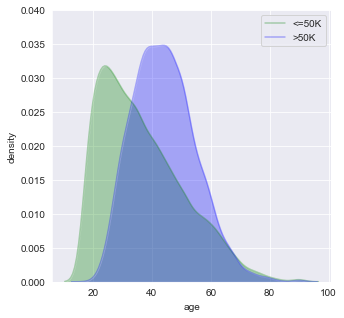

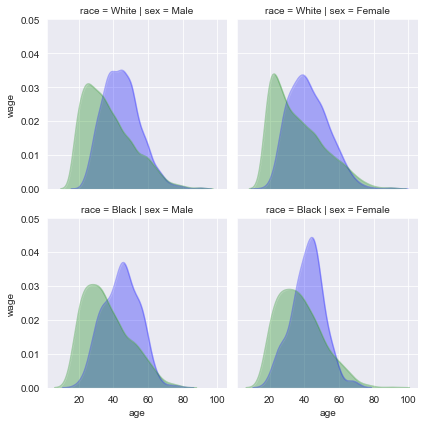

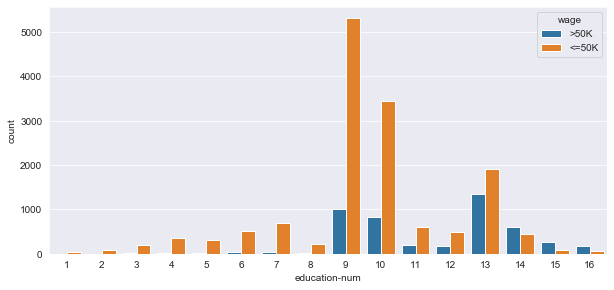

In [11]:
# 8.5. 시각화
fig1 = plt.figure(figsize=(5, 5))
sns.set_style("dark", {'axes.grid' : True})

ax1 = fig1.add_subplot(111)
ax1.set_xlabel("age")
ax1.set_ylabel("density")
ax1.set_ylim(0, 0.04)

df1 = training[training["wage"] == "<=50K"]
df2 = training[training["wage"] == ">50K"]

sns.distplot(df1["age"], ax=ax1, hist=False,
             kde_kws={"alpha": .3, "color": "g",
                      "shade": True, "label": "<=50K"})
sns.distplot(df2["age"], ax=ax1, hist=False,
             kde_kws={"alpha": .3, "color": "b",
                      "shade": True, "label": ">50K"})

df3 = training.loc[(training["race"] == "White") |
                   (training["race"] == "Black")]

g = sns.FacetGrid(df3, row="race", col="sex", hue="wage",
                  hue_kws={"color": ["b", "g"]})
g.set(ylim=(0, .05))
g.map(sns.distplot, "age", "wage", hist=False,
      kde_kws={"alpha": .3, "shade": True})

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(211)
sns.countplot(x="education-num", hue="wage", data=training, ax=ax2)

plt.show()

In [12]:
# 8.6. 로지스틱 회귀분석

# glms cannot interpret strings.
# We have to assign each label a numeric id. 
le = preprocessing.LabelEncoder()
le.fit(["<=50K", ">50K"])
y = le.transform(training["wage"])
X = design_matrix_adult.loc[training_idx]

lm = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
res = lm.fit()

resid_deviance = res.resid_deviance

print("Deviance Residuals:", "\nMin: {} \nMedian: {} \nMax: {}".format(
       resid_deviance.max(), resid_deviance.min(), resid_deviance.median()))

display(res.summary())

test_X = design_matrix_adult[1:6]
res.predict(test_X)

C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encounte

Deviance Residuals: 
Min: inf 
Median: -inf 
Max: -inf


C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:943: RuntimeWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19536
Model:                            GLM   Df Residuals:                    19437
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 12 Feb 2020   Deviance:                          nan
Time:                        13:04:29   Pearson chi2:                 2.27e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
(Intercept)                               -3.117e+15   9.69e+06  -3.22e+08      0.000   -3.12e+15   -3.12e+15
workclass_Federal-gov                      4.206e+14   3.54e+06   1.19e+08      0.000    4.21e+14    4.21e+14
workclass_Local-gov                       -1.939e+13   3.06e+06  -6.33e+06      0.000   -1.94e+13   -1.94e+13
workclass_Never-worked                    -1.818e+15   3.88e+07  -4.68e+07      0.000   -1.82e+15   -1.82e+15
workclass_Private                           7.53e+13   2.47e+06   3.05e+07      0.000    7.53e+13    7.53e+13
workclass_Self-emp-inc                      2.24e+14   3.54e+06   6.33e+07      0.000    2.24e+14    2.24e+14
workclass_Self-emp-not-inc                -1.768e+14   2.95e+06  -5.99e+07      0.000   -1.77e+14   -1.77e+14
workclass_State-gov                       -6.255e+13   3.34e+06  -1.87e+07      0.000   -6.25e+13   -6.25e+13
workclass_Without-pay                     -1.918e+15   1.95e+07  -9.86e+07      0.000   -1.92e+15   -1.92e+15
education_11th                            -7.727e+13   3.64e+06  -2.12e+07      0.000   -7.73e+13   -7.73e+13
education_12th                             2.576e+14   4.92e+06   5.24e+07      0.000    2.58e+14    2.58e+14
education_1st-4th                          2.861e+14   7.86e+06   3.64e+07      0.000    2.86e+14    2.86e+14
education_5th-6th                         -1.584e+14   6.05e+06  -2.62e+07      0.000   -1.58e+14   -1.58e+14
education_7th-8th                          -2.21e+14   4.77e+06  -4.63e+07      0.000   -2.21e+14   -2.21e+14
education_9th                              3.959e+13   4.83e+06   8.19e+06      0.000    3.96e+13    3.96e+13
education_Assoc-acdm                       3.369e+14   3.23e+06   1.04e+08      0.000    3.37e+14    3.37e+14
education_Assoc-voc                        2.176e+14   3.13e+06   6.94e+07      0.000    2.18e+14    2.18e+14
education_Bachelors                        7.029e+14    2.4e+06   2.92e+08      0.000    7.03e+14    7.03e+14
education_Doctorate                       -4.528e+14    4.1e+06  -1.11e+08      0.000   -4.53e+14   -4.53e+14
education_HS-grad                          1.955e+14   2.49e+06   7.84e+07      0.000    1.95e+14    1.95e+14
education_Masters                          1.058e+14   2.87e+06   3.69e+07      0.000    1.06e+14    1.06e+14
education_Preschool                        -2.92e+15   1.24e+07  -2.35e+08      0.000   -2.92e+15   -2.92e+15
education_Prof-school                     -2.524e+14   3.82e+06  -6.61e+07      0.000   -2.52e+14   -2.52e+14
education_Some-college                     3.259e+14   2.46e+06   1.32e+08      0.000    3.26e+14    3.26e+14
marital-status_Married-AF-spouse          -2.491e+14   2.02e+07  -1.23e+07      0.000   -2.49e+14   -2.49e+14
mar

1    1.0
2    0.0
3    0.0
4    1.0
5    1.0
dtype: float64

nan


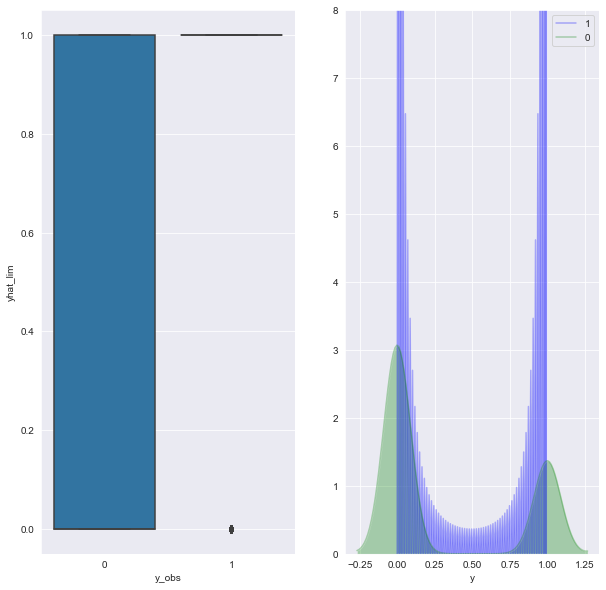

In [13]:
# 8.6.4. 예측 정확도 지표
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)

y_obs = le.transform(validation["wage"])
yhat_lm = res.predict(design_matrix_adult.loc[validate_idx])
df = pd.DataFrame({"x": y_obs, "y": yhat_lm})
sns.boxplot(x="x", y="y", data=df, ax=ax1)

ax1.set_xlabel("y_obs")
ax1.set_ylabel("yhat_lim")

ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 8)

sns.distplot(df[df["x"] == 1]["y"], ax=ax2, hist=False,
             kde_kws={"alpha": .3, "color": "b",
                      "shade": True, "label": "1"})
sns.distplot(df[df["x"] == 0]["y"], ax=ax2, hist=False,
             kde_kws={"alpha": .3, "color": "g",
                      "shade": True, "label": "0"})

print(res.deviance)

plt.show()

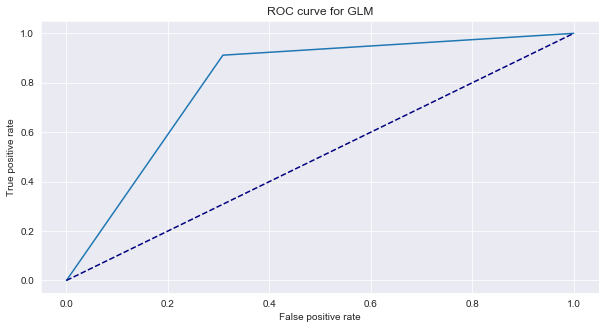

0.8016321634994089


In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title("ROC curve for GLM")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

fpr, tpr, _ = roc_curve(y_obs, yhat_lm)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.show()

print(auc(fpr, tpr))